In [24]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob
import matplotlib.pyplot as plt

import thicket as th


In [25]:
#tk = th.Thicket.from_caliperreader(glob("../CUDA/t64-v65536.cali"))
#tk = th.Thicket.from_caliperreader(glob("p2-a65536-i1.cali"))
tk = th.Thicket.from_caliperreader(glob("*-i1.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel"], axis=1)
tk.dataframe

Min time/rank  \
node                                              profile                    
{'name': 'main', 'type': 'function'}              720370020     393.752260   
                                                  887681656     783.735035   
{'name': 'comm', 'type': 'function'}              720370020       0.584049   
                                                  887681656       1.089346   
{'name': 'comm_large', 'type': 'function'}        720370020       0.556104   
                                                  887681656       1.080461   
{'name': 'comm_small', 'type': 'function'}        720370020       0.027790   
                                                  887681656       0.008743   
{'name': 'comp', 'type': 'function'}              720370020     391.947733   
                                                  887681656     782.221789   
{'name': 'comp_large', 'type': 'function'}        720370020     391.925011   
                                                  887681656     781.855156   
{'name': 'comp', 'type': 'function'}              720370020     391.859543   
                                                  887681656     781.790879   
{'name': 'comp_large', 'type': 'function'}        720370020     391.859492   
                                                  887681656     781.790827   
{'name': 'comp_small', 'type': 'function'}        720370020       0.022622   
                                                  887681656       0.366565   
{'name': 'comp', 'type': 'function'}              720370020       0.022595   
                                                  887681656       0.366549   
{'name': 'comp_small', 'type': 'function'}        720370020       0.022581   
                                                  887681656       0.366532   
{'name': 'correctness_check', 'type': 'function'} 720370020       0.000191   
                                                  887681656       0.000191   
{'name': 'data_init', 'type': 'function'}         720370020       0.000219   
                                                  887681656       0.000219   

                                                             Max time/rank  \
node                                              profile                    
{'name': 'main', 'type': 'function'}              720370020     393.752260   
                                                  887681656     783.735035   
{'name': 'comm', 'type': 'function'}              720370020       0.584049   
                                                  887681656       1.089346   
{'name': 'comm_large', 'type': 'function'}        720370020       0.556104   
                                                  887681656       1.080461   
{'name': 'comm_small', 'type': 'function'}        720370020       0.027790   
                                                  887681656       0.008743   
{'name': 'comp', 'type': 'function'}              720370020     391.947733   
                                                  887681656     782.221789   
{'name': 'comp_large', 'type': 'function'}        720370020     391.925011   
                                                  887681656     781.855156   
{'name': 'comp', 'type': 'function'}              720370020     391.859543   
                                                  887681656     781.790879   
{'name': 'comp_large', 'type': 'function'}        720370020     391.859492   
                                                  887681656     781.790827   
{'name': 'comp_small', 'type': 'function'}        720370020       0.022622   
                                                  887681656       0.366565   
{'name': 'comp', 'type': 'function'}              720370020       0.022595   
                                                  887681656       0.366549   
{'name': 'comp_small', 'type': 'function'}        720370020       0.022581   
                                                  887681656       0.366532   
{'na

In [26]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,...,implementation_source,main,data_init,comm,comp,comm_large,comm_small,comp_large,comp_small,correctness_check
profile,,,,,,,,,,,,,,,,,,,,,
720370020,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v65536-i1.cali,...,Handwritten,main,data_init,comm,comp,comm_large,comm_small,comp_large,comp_small,correctness_check
887681656,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v65536-i1.cali,...,Handwritten,main,data_init,comm,comp,comm_large,comm_small,comp_large,comp_small,correctness_check


In [27]:
tk.statsframe.dataframe["time"] = 1
print(tk.tree())


  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  └─ 1.000 comm_small
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  │  └─ 1.000 comp
│  │     └─ 1.000 comp_large
│  └─ 1.000 comp_small
│     └─ 1.000 comp
│        └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [28]:
tk.metadata.columns

Index(['cali.caliper.version', 'spot.metrics', 'spot.timeseries.metrics',
       'spot.format.version', 'spot.options', 'spot.channels', 'cali.channel',
       'spot:cuda.gputime', 'spot:node.order', 'spot:output', 'launchdate',
       'libraries', 'cmdline', 'cluster', 'Algorithm', 'ProgrammingModel',
       'Datatype', 'SizeOfDatatype', 'InputSize', 'InputType', 'num_threads',
       'num_blocks', 'group_num', 'implementation_source', 'main', 'data_init',
       'comm', 'comp', 'comm_large', 'comm_small', 'comp_large', 'comp_small',
       'correctness_check'],
      dtype='object')

In [29]:
gb = tk.groupby("InputSize")

1  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ada0bc12d90>}


In [30]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)


In [31]:
ctk.dataframe

65536  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              512            783.735035   
                                                  1024           393.752260   
{'name': 'comm', 'type': 'function'}              512              1.089346   
                                                  1024             0.584049   
{'name': 'comm_large', 'type': 'function'}        512              1.080461   
                                                  1024             0.556104   
{'name': 'comm_small', 'type': 'function'}        512              0.008743   
                                                  1024             0.027790   
{'name': 'comp', 'type': 'function'}              512            782.221789   
                                                  1024           391.947733   
{'name': 'comp_large', 'type': 'function'}        512            781.855156   
                                                  1024           391.925011   
{'name': 'comp', 'type': 'function'}              512            781.790879   
                                                  1024           391.859543   
{'name': 'comp_large', 'type': 'function'}        512            781.790827   
                                                  1024           391.859492   
{'name': 'comp_small', 'type': 'function'}        512              0.366565   
                                                  1024             0.022622   
{'name': 'comp', 'type': 'function'}              512              0.366549   
                                                  1024             0.022595   
{'name': 'comp_small', 'type': 'function'}        512              0.366532   
                                                  1024             0.022581   
{'name': 'correctness_check', 'type': 'function'} 512              0.000191   
                                                  1024             0.000191   
{'name': 'data_init', 'type': 'function'}         512              0.000219   
                                                  1024             0.000219   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              512            783.735035   
                                                  1024           393.752260   
{'name': 'comm', 'type': 'function'}              512              1.089346   
                                                  1024             0.584049   
{'name': 'comm_large', 'type': 'function'}        512              1.080461   
                                                  1024             0.556104   
{'name': 'comm_small', 'type': 'function'}        512              0.008743   
                                                  1024             0.027790   
{'name': 'comp', 'type': 'function'}              512            782.221789   
                                                  1024           391.947733   
{'name': 'comp_large', 'type': 'function'}        512            781.855156   
                                                  1024           391.925011   
{'name': 'comp', 'type': 'function'}              512            781.790879   
                                                  1024           391.859543   
{'name': 'comp_large', 'type': 'function'}        512            781.790827   
                                                  1024           391.859492   
{'name': 'comp_small', 'type': 'function'}        512              0.366565   
                                                  1024             0.022622   
{'name': 'comp', 'type': 'function'}              512              0.366549   
                                        

In [32]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# Drop "time" label as it is redundant
#ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)



/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [33]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
input_sizes = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))


In [34]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
   # plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(num_threads)
    plt.show()
    return fig, ax


/tmp/job.9312446/ipykernel_76477/1541405188.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,size],


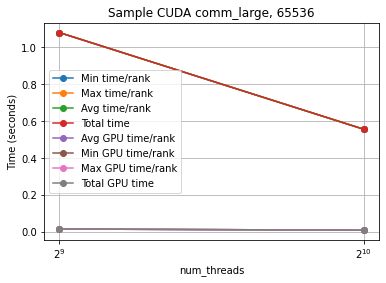

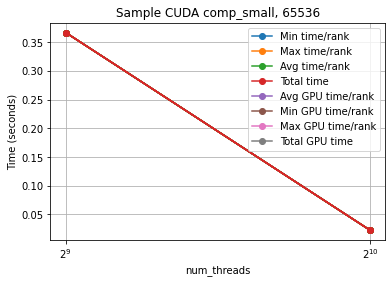

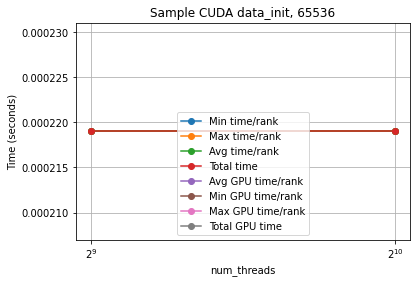

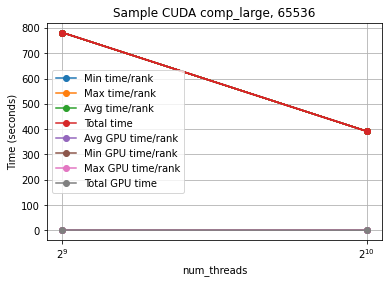

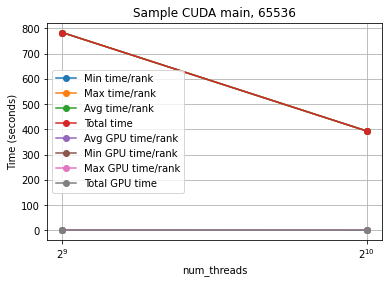

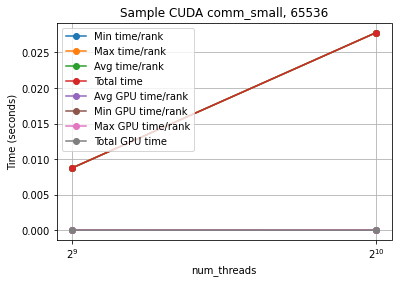

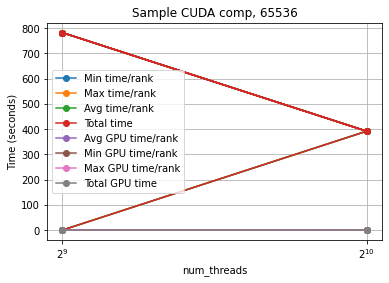

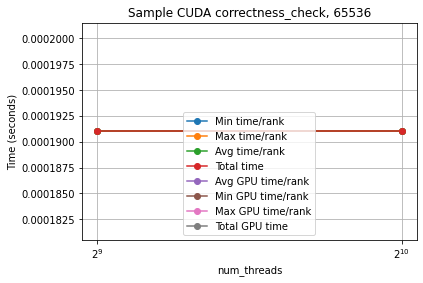

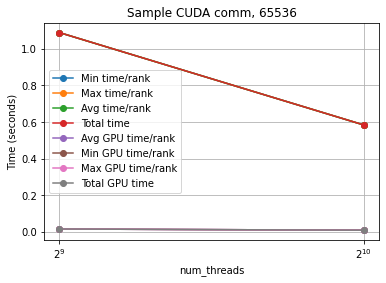

In [39]:
for name in function_names:
     for size in input_sizes:
        plot_mpl(
            df=ctk.dataframe.loc[name,size],
            title=f"Sample CUDA {name}, {size}", 
            xlabel="num_threads",
            ylabel="Time (seconds)",
        )
